<a href="https://colab.research.google.com/github/pranidhi23/aiml/blob/main/PRANIDHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Match Outcomes:
match_outcome
team2    8
team1    6
Name: count, dtype: int64


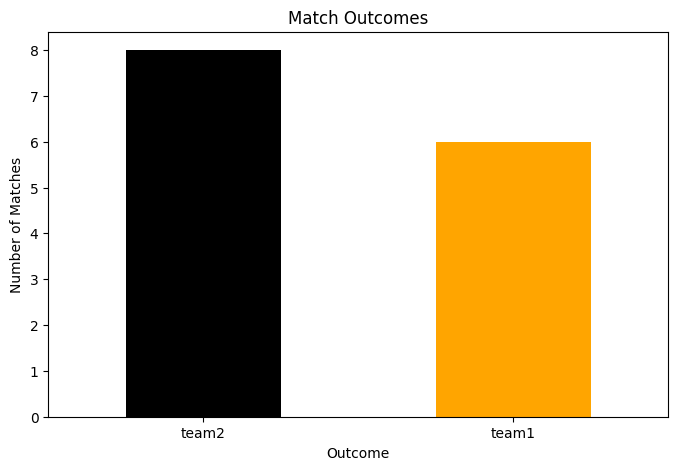


Winning Margin Distribution:
count    13.000000
mean     22.692308
std      14.378135
min      10.000000
25%      15.000000
50%      20.000000
75%      25.000000
max      55.000000
Name: winning_margin, dtype: float64


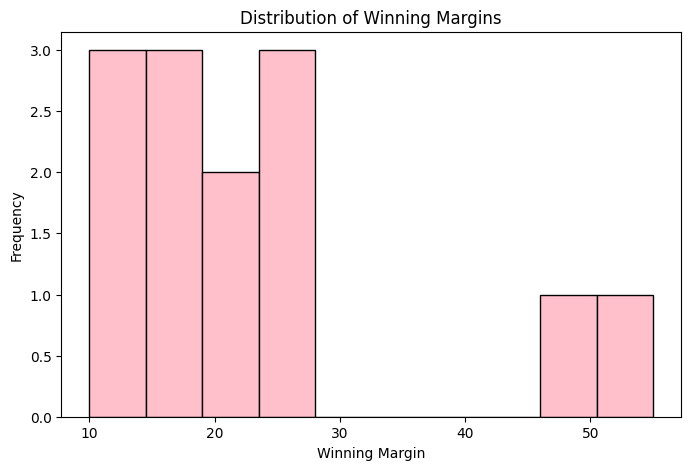


Player Performance Over Seasons:
season            2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  \
player_of_match                                                                
Andre Russell        0     0     0     0     0     1     0     0     0     0   
Jasprit Bumrah       0     0     0     0     1     0     0     0     0     0   
MS Dhoni             0     1     0     0     0     0     0     0     1     0   
Ravindra Jadeja      0     0     0     0     0     0     1     0     0     0   
Rohit Sharma         0     0     0     1     0     0     0     1     0     0   
Sachin Tendulkar     1     0     0     0     0     0     0     0     0     0   
Virat Kohli          0     0     1     0     0     0     0     0     0     1   

season            2018  2019  2020  2021  
player_of_match                           
Andre Russell        0     1     0     0  
Jasprit Bumrah       1     0     0     0  
MS Dhoni             0     0     0     0  
Ravindra Jadeja      0     0  

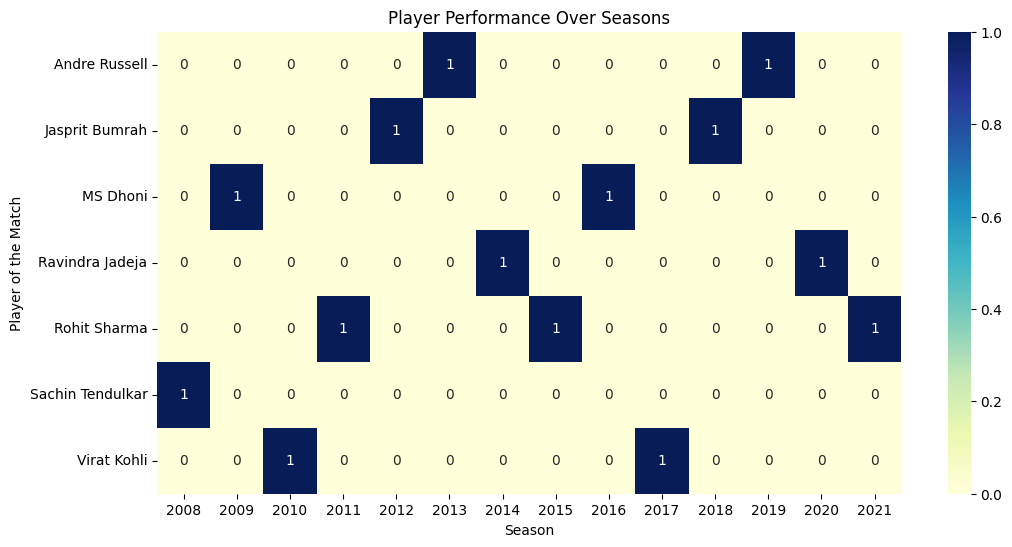


Home Wins:
match_outcome
team2    2
Name: count, dtype: int64

Away Wins:
match_outcome
team2    6
team1    6
Name: count, dtype: int64


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample IPL Data
ipl_data={
    'season': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'team1': ['MI', 'CSK', 'RCB', 'KKR', 'DC', 'SRH', 'RR', 'KXIP', 'MI', 'CSK', 'RCB', 'KKR', 'DC', 'SRH'],
    'team2': ['RCB', 'KKR', 'MI', 'CSK', 'SRH', 'RR', 'KXIP', 'MI', 'CSK', 'RCB', 'KKR', 'DC', 'SRH', 'RR'],
    'city': ['Mumbai', 'Chennai', 'Bangalore', 'Kolkata', 'Delhi', 'Bangalore', 'Kolkata', 'Mumbai', 'Chennai', 'Bangalore', 'Kolkata', 'Delhi', 'Bangalore', 'Kolkata'],
    'player_of_match': ['Sachin Tendulkar', 'MS Dhoni', 'Virat Kohli', 'Rohit Sharma', 'Jasprit Bumrah', 'Andre Russell', 'Ravindra Jadeja', 'Rohit Sharma', 'MS Dhoni', 'Virat Kohli', 'Jasprit Bumrah', 'Andre Russell', 'Ravindra Jadeja', 'Rohit Sharma'],
    'runs_scored': [100, 120, 175, 150, 200, 190, 170, 180, 165, 190, 175, 160, 185, 195]
}

ipl_df = pd.DataFrame(ipl_data)

# Adding new attributes to the DataFrame
ipl_df['match_outcome'] = ['team1' if score1 > score2 else 'team2' for score1, score2 in zip(ipl_df['runs_scored'], ipl_df['runs_scored'].shift(-1))]
ipl_df['winning_margin'] = [abs(score1 - score2) for score1, score2 in zip(ipl_df['runs_scored'], ipl_df['runs_scored'].shift(-1))]
ipl_df['home_away'] = ['Home' if team == 'MI' else 'Away' for team in ipl_df['team1']]  # Example for MI, you can generalize this

# 1. Winning Trends
winning_trends = ipl_df['match_outcome'].value_counts()
print("Match Outcomes:")
print(winning_trends)

# Plotting Winning Trends
plt.figure(figsize=(8, 5))
winning_trends.plot(kind='bar', color=['black', 'orange'])
plt.title('Match Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Number of Matches')
plt.xticks(rotation=0)
plt.show()

# 2. Winning Margin Distribution
winning_margin_distribution = ipl_df['winning_margin'].describe()
print("\nWinning Margin Distribution:")
print(winning_margin_distribution)

# Plotting Winning Margin Distribution
plt.figure(figsize=(8, 5))
plt.hist(ipl_df['winning_margin'], bins=10, color='pink', edgecolor='black')
plt.title('Distribution of Winning Margins')
plt.xlabel('Winning Margin')
plt.ylabel('Frequency')
plt.show()

# 3. Player Performance Over Seasons
player_performance = ipl_df.groupby(['player_of_match', 'season']).size().unstack(fill_value=0)
print("\nPlayer Performance Over Seasons:")
print(player_performance)

# Plotting Player Performance Over Seasons
plt.figure(figsize=(12, 6))
sns.heatmap(player_performance, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Player Performance Over Seasons')
plt.xlabel('Season')
plt.ylabel('Player of the Match')
plt.show()

# 4. Home Advantage Analysis
home_wins = ipl_df[ipl_df['home_away'] == 'Home']['match_outcome'].value_counts()
away_wins = ipl_df[ipl_df['home_away'] == 'Away']['match_outcome'].value_counts()

print("\nHome Wins:")
print(home_wins)
print("\nAway Wins:")
print(away_wins)

